In [1]:
import mysql.connector
import pandas as pd
from tqdm import tqdm
import os
pd.set_option('display.max_columns', None)


mydb = mysql.connector.connect(
  host="reps-ods-cluster-1.cluster-ro-curqk9xgnt28.us-east-2.rds.amazonaws.com",
  port='3306',
  database ='lobsang',
  user="jaybhatt",
  password="72QmYetSNfGM"
)

In [2]:
# ## Getting Distinct vanue names from lobsang
# get_venue_query = '''select * from event e where e.datetime > (CURDATE()-INTERVAL 2 YEAR) and 
#                     e.datetime < CURDATE() and
#                      e.name not like "%postponed%" and e.name not like "%Rescheduled%"'''

# event_df = pd.read_sql(get_venue_query, con=mydb)

# event_df.head(5)

In [3]:
# inventory_data_query = '''select  l2.type, l2.amount,l2.datetime,t.seat,t.section,t.row,t.cost,
# e.name as event_name,e.venue,e.datetime as event_date,e.id as event_id
# from line l2 join 
# join line ticket on l2.foreign_id = t.foreign_id
# event_link el on t.foreign_id = el.foreign_id
# join event e on el.id = e.id;
# where e.id = 3856802 ''' 

In [4]:
# inv_df = pd.read_sql(inventory_data_query, con=mydb)

In [5]:
line_query = "select * from line where foreign_event_id= 3856802"

In [6]:
line_df = pd.read_sql(line_query, con=mydb)

In [7]:
line_df.head()

,id,foreign_id,foreign_event_id,amount,cancelled,parent_id,type,datetime,in_hand_date,notes,org_id
0,3749593,265473546,3856802,296.9,0,1296590,purchase,2022-02-21 15:19:02,2022-05-31,cmoore@a2zcapital.com 57-38821/NY2 CC# 1828 MC...,1
1,3749595,265473555,3856802,296.9,0,1296592,purchase,2022-02-21 15:19:03,2022-05-31,aliwatkins@dualcrownclub.com 57-38820/NY2 CC# ...,1
2,3749606,265473618,3856802,296.9,0,1296603,purchase,2022-02-21 15:19:09,2022-05-31,alarcon@wrymethods.com 57-38819/NY2 CC# 3169 M...,1
3,3749620,265475230,3856802,296.9,0,1296617,purchase,2022-02-21 15:21:14,2022-05-31,connoro@pinesdrops.com 57-38824/NY2 CC# 6834 M...,1
4,3749621,265475239,3856802,296.9,0,1296618,purchase,2022-02-21 15:21:16,2022-05-31,nlouiseviernes@pamubuds.com 57-38825/NY2 CC# 3...,1


In [8]:
purchage_inv = line_df[line_df.type=='purchase']

In [9]:
sell_inv = line_df[line_df.type=='invoice']

In [10]:
sell_inv_sum = sell_inv.groupby('datetime').sum()
sell_inv_sum.head()

,id,foreign_id,amount,cancelled,parent_id,org_id
datetime,,,,,,
2022-02-19 17:17:38,3755792,264956783,96.30,0,2320482,1
2022-02-19 19:48:07,7512591,530006114,96.58,0,4641863,2
2022-02-19 23:16:09,3757051,265062346,106.62,0,2321563,1
2022-02-19 23:36:00,3757103,265068179,96.34,0,2321614,1
2022-02-20 15:58:36,3758516,265217057,202.32,0,2322888,1


In [11]:
purchage_inv.groupby('datetime').count()

,id,foreign_id,foreign_event_id,amount,cancelled,parent_id,type,in_hand_date,notes,org_id
datetime,,,,,,,,,,
2022-02-18 17:47:14,1,1,1,1,1,1,1,1,1,1
2022-02-18 17:47:16,2,2,2,2,2,2,2,2,2,2
2022-02-18 17:47:17,1,1,1,1,1,1,1,1,1,1
2022-02-18 17:51:17,2,2,2,2,2,2,2,2,2,2
2022-02-18 17:51:18,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
2022-03-04 16:26:21,1,1,1,1,1,1,1,1,1,1
2022-03-04 16:28:14,1,1,1,1,1,1,1,1,1,1
2022-03-04 16:28:16,1,1,1,1,1,1,1,1,1,1


In [12]:
count_sell_inv = sell_inv.groupby('datetime').count()[['id']]
count_sell_inv.head()

,id
datetime,
2022-02-19 17:17:38,1
2022-02-19 19:48:07,2
2022-02-19 23:16:09,1
2022-02-19 23:36:00,1
2022-02-20 15:58:36,1


In [13]:
purchage_inv_sum = purchage_inv.groupby('datetime').sum()

In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sold inventory count')

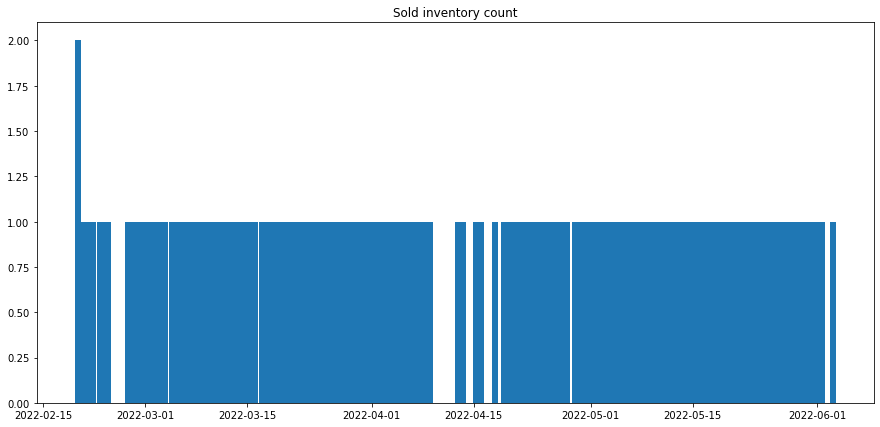

In [15]:
plt.figure(figsize=(15,7))
plt.bar(count_sell_inv.index,count_sell_inv.id)
plt.title("Sold inventory count")

In [16]:
all_df  = count_sell_inv.rename(columns = {'id':'Qty'}).join(sell_inv_sum[['amount']]).join(purchage_inv_sum[['amount']],lsuffix='_sold',how='outer')

In [17]:
pur_grp = purchage_inv.groupby('datetime').count()[['id']].rename(columns={'id':'purchage_qty'})

In [18]:
all_df = all_df.join(pur_grp[['purchage_qty']])

In [19]:
all_df = all_df.reset_index()

In [20]:
all_df['date'] = all_df.datetime.dt.date

In [21]:
all_df = all_df.groupby('date').sum()

In [22]:
all_df.head()

,Qty,amount_sold,amount,purchage_qty
date,,,,
2022-02-18,0.0,0.00,20707.6,66.0
2022-02-19,5.0,395.84,0.0,0.0
2022-02-20,3.0,299.16,0.0,0.0
2022-02-21,3.0,241.85,39395.4,134.0
2022-02-22,1.0,159.00,0.0,0.0


In [23]:
all_df.rename(columns={'amount':'purchage_amount','Qty':'sold_qty'},inplace=1)

In [24]:
all_df.head()

,sold_qty,amount_sold,purchage_amount,purchage_qty
date,,,,
2022-02-18,0.0,0.00,20707.6,66.0
2022-02-19,5.0,395.84,0.0,0.0
2022-02-20,3.0,299.16,0.0,0.0
2022-02-21,3.0,241.85,39395.4,134.0
2022-02-22,1.0,159.00,0.0,0.0


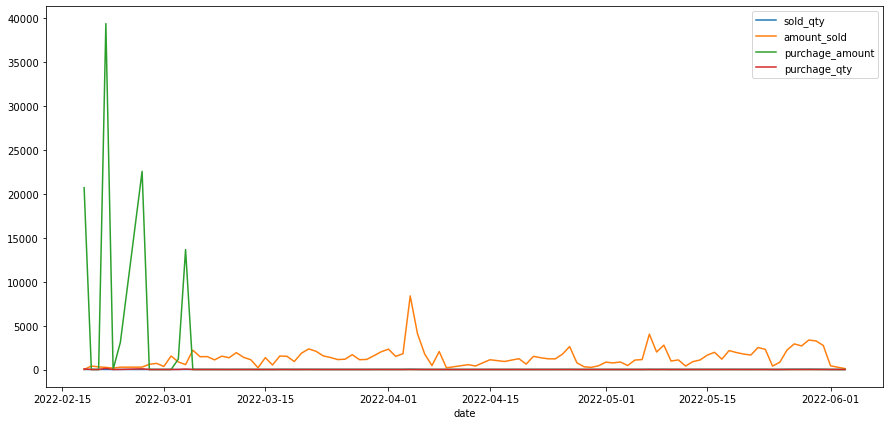

In [25]:
all_df.plot(figsize=(15,7))
plt.legend()
plt.show()

In [26]:
all_df['DTE'] = max(all_df.index)-all_df.index

In [27]:
all_df

,sold_qty,amount_sold,purchage_amount,purchage_qty,DTE
date,,,,,
2022-02-18,0.0,0.00,20707.6,66.0,105 days
2022-02-19,5.0,395.84,0.0,0.0,104 days
2022-02-20,3.0,299.16,0.0,0.0,103 days
2022-02-21,3.0,241.85,39395.4,134.0,102 days
2022-02-22,1.0,159.00,0.0,0.0,101 days
...,...,...,...,...,...
2022-05-29,31.0,3359.30,0.0,0.0,5 days
2022-05-30,23.0,3251.46,0.0,0.0,4 days
2022-05-31,18.0,2737.99,0.0,0.0,3 days


In [28]:
all_df.to_csv('final_file.csv')

In [29]:
all_df['Ratio'] = all_df['purchage_amount']/(all_df['amount_sold']+1)

In [30]:
all_df['unit_pur_cost'] = all_df['purchage_amount']/all_df['purchage_qty']
all_df['unit_sell'] = all_df['amount_sold']/all_df['sold_qty']

In [31]:
all_df.head()

,sold_qty,amount_sold,purchage_amount,purchage_qty,DTE,Ratio,unit_pur_cost,unit_sell
date,,,,,,,,
2022-02-18,0.0,0.00,20707.6,66.0,105 days,20707.600000,313.751515,NaN
2022-02-19,5.0,395.84,0.0,0.0,104 days,0.000000,NaN,79.168000
2022-02-20,3.0,299.16,0.0,0.0,103 days,0.000000,NaN,99.720000
2022-02-21,3.0,241.85,39395.4,134.0,102 days,162.221124,293.995522,80.616667
2022-02-22,1.0,159.00,0.0,0.0,101 days,0.000000,NaN,159.000000


In [32]:
all_df.to_csv('final_file.csv')

In [33]:
all_df['Ratio'] = (all_df['unit_pur_cost']+1)/(all_df['unit_sell']+1)

In [34]:
all_df['Div_Ratio'] = all_df['Ratio']/all_df['Ratio'].sum()

In [35]:
all_df

,sold_qty,amount_sold,purchage_amount,purchage_qty,DTE,Ratio,unit_pur_cost,unit_sell,Div_Ratio
date,,,,,,,,,
2022-02-18,0.0,0.00,20707.6,66.0,105 days,NaN,313.751515,NaN,NaN
2022-02-19,5.0,395.84,0.0,0.0,104 days,NaN,NaN,79.168000,NaN
2022-02-20,3.0,299.16,0.0,0.0,103 days,NaN,NaN,99.720000,NaN
2022-02-21,3.0,241.85,39395.4,134.0,102 days,3.614403,293.995522,80.616667,0.295326
2022-02-22,1.0,159.00,0.0,0.0,101 days,NaN,NaN,159.000000,NaN
...,...,...,...,...,...,...,...,...,...
2022-05-29,31.0,3359.30,0.0,0.0,5 days,NaN,NaN,108.364516,NaN
2022-05-30,23.0,3251.46,0.0,0.0,4 days,NaN,NaN,141.367826,NaN
2022-05-31,18.0,2737.99,0.0,0.0,3 days,NaN,NaN,152.110556,NaN


In [36]:
all_df['Div_Ratio'].sum()

1.0